# Benchmarks for `Cheby` on dense matrices (not-in-place)

In [1]:
using QuantumPropagators: Cheby

In [2]:
import QuantumPropagators
import CSV
import DataFrames
using Plots
using QuantumControl: run_or_load

In [3]:
import PropagationBenchmarks
using PropagationBenchmarks: run_benchmarks, params, Vary
using PropagationBenchmarks: generate_exact_solution
using PropagationBenchmarks: calibrate_cheby
using PropagationBenchmarks: generate_trial_data, generate_timing_data
using PropagationBenchmarks: BenchmarkSeries
using PropagationBenchmarks:
    Units, plot_prec_runtimes, plot_size_runtime, plot_scaling, plot_overhead

In [4]:
using AppleAccelerate #  no-op on non-Apple
PropagationBenchmarks.info()

Julia Version 1.11.1


Commit 8f5b7ca12ad (2024-10-16 10:53 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 64 × Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, cascadelake)
Threads: 1 default, 0 interactive, 1 GC (on 64 virtual cores)
Environment:
  LD_LIBRARY_PATH = /home/goerz/.local/lib
  JULIA_NUM_THREADS = 1
  JULIA_PKG_PRESERVE_TIERED_INSTALLED = true
  NUMEXPR_NUM_THREADS = 1
  OPENBLAS_NUM_THREADS = 1
  VECLIB_MAXIMUM_THREADS = 1
  OMP_NUM_THREADS = 1
  MKL_NUM_THREADS = 1
BLAS Libraries:
  libopenblas64_.so [ilp64]
Packages:


  QuantumControl         : 0.11.1
  QuantumPropagators     : 0.8.3
  QuantumControlTestUtils: 0.3.1


In [5]:
projectdir(path...) = joinpath(@__DIR__, path...)
datadir(path...) = projectdir("data", "B02_01_Cheby_NotInPlace_Dense", path...)
mkpath(datadir())

SYSTEMS_CACHE = Dict();
EXACT_SOLUTIONS_CACHE = Dict();
CALIBRATION_CACHE = Dict();

QuantumPropagators.disable_timings();

In [6]:
FORCE = (get(ENV, "FORCE", "0") in ["true", "1"])

false

## Runtime over System Size

In [7]:
SYSTEM_PARAMETERS = params(
    # see arguments of `random_dynamic_generator`
    N = Vary(100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
    spectral_envelope = 1.0,
    exact_spectral_envelope = true,
    number_of_controls = 1,
    density = 1,
    hermitian = true,
    dt = 1.0,
    nt = 1001,
);

In [8]:
BENCHMARK_PARAMETERS =
    params(method = Cheby, inplace = false, cheby_coeffs_limit = Vary(1e-15, 1e-8));

In [9]:
size_trial_data = run_or_load(datadir("benchmark_size_trials.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_trial_data,
        systems_cache = SYSTEMS_CACHE,
    )
end;

[ Info: File data/B02_01_Cheby_NotInPlace_Dense/benchmark_size_trials.jld2 does not exist. Creating it now.


generate systems:  20%|██████▋                          |  ETA: 0:00:28

generate systems: 100%|█████████████████████████████████| Time: 0:00:08

calibrate:         10%|███▎                             |  ETA: 0:00:02

calibrate:        100%|█████████████████████████████████| Time: 0:00:00


benchmark:         10%|███▎                             |  ETA: 0:06:06

benchmark:         15%|█████                            |  ETA: 0:08:41

benchmark:         20%|██████▋                          |  ETA: 0:07:36

benchmark:         25%|████████▎                        |  ETA: 0:07:01

benchmark:         30%|█████████▉                       |  ETA: 0:06:09

benchmark:         35%|███████████▌                     |  ETA: 0:05:57

benchmark:         40%|█████████████▎                   |  ETA: 0:05:54

benchmark:         45%|██████████████▉                  |  ETA: 0:05:11

benchmark:         50%|████████████████▌                |  ETA: 0:04:32

benchmark:         55%|██████████████████▏              |  ETA: 0:03:57

benchmark:         60%|███████████████████▊             |  ETA: 0:03:39

benchmark:         65%|█████████████████████▌           |  ETA: 0:03:14

benchmark:         70%|███████████████████████▏         |  ETA: 0:02:42

benchmark:         75%|████████████████████████▊        |  ETA: 0:02:16

benchmark:         80%|██████████████████████████▍      |  ETA: 0:01:48

benchmark:         85%|████████████████████████████     |  ETA: 0:01:19

benchmark:         90%|█████████████████████████████▊   |  ETA: 0:00:54

benchmark:         95%|███████████████████████████████▍ |  ETA: 0:00:27

benchmark:        100%|█████████████████████████████████| Time: 0:08:49

In [10]:
QuantumPropagators.enable_timings();

size_timing_data = run_or_load(datadir("benchmark_size_timing.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_timing_data,
        systems_cache = SYSTEMS_CACHE,
    )
end;

QuantumPropagators.disable_timings();

[ Info: File data/B02_01_Cheby_NotInPlace_Dense/benchmark_size_timing.jld2 does not exist. Creating it now.


benchmark:         10%|███▎                             |  ETA: 0:01:18

benchmark:         15%|█████                            |  ETA: 0:01:42

benchmark:         20%|██████▋                          |  ETA: 0:01:51

benchmark:         25%|████████▎                        |  ETA: 0:02:40

benchmark:         30%|█████████▉                       |  ETA: 0:02:05

benchmark:         35%|███████████▌                     |  ETA: 0:02:24

benchmark:         40%|█████████████▎                   |  ETA: 0:02:43

benchmark:         45%|██████████████▉                  |  ETA: 0:02:17

benchmark:         50%|████████████████▌                |  ETA: 0:01:53

benchmark:         55%|██████████████████▏              |  ETA: 0:01:33

benchmark:         60%|███████████████████▊             |  ETA: 0:01:28

benchmark:         65%|█████████████████████▌           |  ETA: 0:01:20

benchmark:         70%|███████████████████████▏         |  ETA: 0:01:20

benchmark:         75%|████████████████████████▊        |  ETA: 0:01:02

benchmark:         80%|██████████████████████████▍      |  ETA: 0:00:50

benchmark:         85%|████████████████████████████     |  ETA: 0:00:36

benchmark:         90%|█████████████████████████████▊   |  ETA: 0:00:23

benchmark:         95%|███████████████████████████████▍ |  ETA: 0:00:12

benchmark:        100%|█████████████████████████████████| Time: 0:04:01

In [11]:
size_runtime_data = merge(size_trial_data, size_timing_data)

Row,N,cheby_coeffs_limit,init_prop,propagate,timesteps,matrix_vector_products,percent
1,100,1.0e-15,Trial(1.146 ms),Trial(104.569 ms),1000,15000,77.7367
2,100,1.0e-8,Trial(1.149 ms),Trial(72.939 ms),1000,10000,73.433
3,200,1.0e-15,Trial(1.635 ms),Trial(307.594 ms),1000,15000,73.685
4,200,1.0e-8,Trial(1.634 ms),Trial(210.741 ms),1000,10000,71.9887
5,300,1.0e-15,Trial(4.332 ms),Trial(1.124 s),1000,15000,90.1905
6,300,1.0e-8,Trial(4.330 ms),Trial(761.140 ms),1000,10000,90.087
7,400,1.0e-15,Trial(9.755 ms),Trial(2.793 s),1000,15000,95.2235
8,400,1.0e-8,Trial(9.780 ms),Trial(1.860 s),1000,10000,94.378
9,500,1.0e-15,Trial(16.424 ms),Trial(4.822 s),1000,15000,96.5254
10,500,1.0e-8,Trial(16.503 ms),Trial(3.234 s),1000,10000,96.9617


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_Cheby_NotInPlace_Dense/cheby_notinplace_dense_runtime_size_high.csv
[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_Cheby_NotInPlace_Dense/cheby_notinplace_dense_runtime_size_low.csv


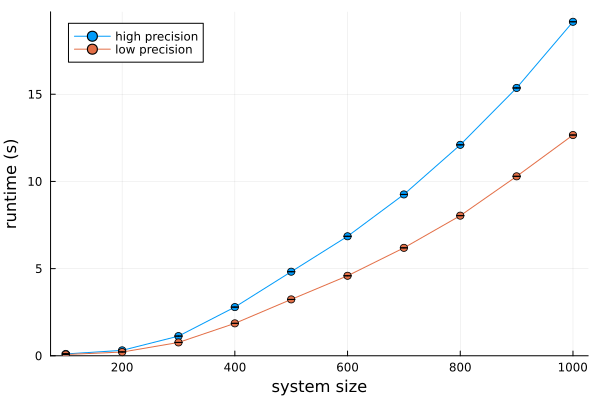

In [12]:
plot_size_runtime(
    size_runtime_data;
    label = "{key} precision",
    csv = datadir("cheby_notinplace_dense_runtime_size_{key}.csv")
) do row
    if row[:cheby_coeffs_limit] == 1e-15
        return :high
    elseif row[:cheby_coeffs_limit] == 1e-8
        return :low
    else
        error("Unexpected `cheby_coeffs_limit`")
    end
end

## Runtime over Precision

In [13]:
PRECISION = Vary(1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-15);

In [14]:
SYSTEM_PARAMETERS = params(
    # see arguments of `random_dynamic_generator`
    N = Vary(1_000, 100, 10),
    spectral_envelope = 1.0,
    exact_spectral_envelope = true,
    number_of_controls = 1,
    density = 1,
    hermitian = true,
    dt = 1.0,
    nt = 1001,
);

In [15]:
EXACT_SOLUTION_PARAMETERS =
    params(method = Cheby, inplace = false, cheby_coeffs_limit = 1e-15,);

In [16]:
BENCHMARK_PARAMETERS = params(method = Cheby, inplace = false, precision = PRECISION,);

In [17]:
prec_trial_data = run_or_load(datadir("benchmark_prec_trials.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        exact_solution_parameters = EXACT_SOLUTION_PARAMETERS,
        generate_exact_solution = generate_exact_solution,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_trial_data,
        calibrate = calibrate_cheby,  # translate `precision` into `cheby_coeffs_limit`
        calibrated_keys_to_store = [:cheby_coeffs_limit],
        systems_cache = SYSTEMS_CACHE,
        calibration_cache = CALIBRATION_CACHE,
        exact_solutions_cache = EXACT_SOLUTIONS_CACHE,
    )
end;

[ Info: File data/B02_01_Cheby_NotInPlace_Dense/benchmark_prec_trials.jld2 does not exist. Creating it now.


exact solutions:   67%|██████████████████████           |  ETA: 0:00:12

exact solutions:  100%|█████████████████████████████████| Time: 0:00:23


calibrate:          7%|██▎                              |  ETA: 0:16:00

calibrate:         10%|███▎                             |  ETA: 0:10:23

calibrate:         13%|████▍                            |  ETA: 0:14:26

calibrate:         20%|██████▋                          |  ETA: 0:08:54

calibrate:         23%|███████▊                         |  ETA: 0:14:05

calibrate:         27%|████████▊                        |  ETA: 0:11:48

calibrate:         30%|█████████▉                       |  ETA: 0:13:34

calibrate:         37%|████████████▏                    |  ETA: 0:10:03

calibrate:         40%|█████████████▎                   |  ETA: 0:08:44

calibrate:         47%|███████████████▍                 |  ETA: 0:06:40

calibrate:         57%|██████████████████▊              |  ETA: 0:04:28

calibrate:         60%|███████████████████▊             |  ETA: 0:03:54

calibrate:         63%|████████████████████▉            |  ETA: 0:03:23

calibrate:         67%|██████████████████████           |  ETA: 0:02:56

calibrate:         70%|███████████████████████▏         |  ETA: 0:03:16

calibrate:         73%|████████████████████████▎        |  ETA: 0:02:47

calibrate:         77%|█████████████████████████▎       |  ETA: 0:02:20

calibrate:         80%|██████████████████████████▍      |  ETA: 0:02:21

calibrate:         83%|███████████████████████████▌     |  ETA: 0:02:03

calibrate:         87%|████████████████████████████▋    |  ETA: 0:01:42

calibrate:         93%|██████████████████████████████▊  |  ETA: 0:00:47

calibrate:        100%|█████████████████████████████████| Time: 0:11:04

benchmark:          7%|██▎                              |  ETA: 0:08:20

benchmark:         10%|███▎                             |  ETA: 0:08:01

benchmark:         13%|████▍                            |  ETA: 0:10:32

benchmark:         17%|█████▌                           |  ETA: 0:11:19

benchmark:         20%|██████▋                          |  ETA: 0:11:48

benchmark:         23%|███████▊                         |  ETA: 0:10:40

benchmark:         27%|████████▊                        |  ETA: 0:11:03

benchmark:         30%|█████████▉                       |  ETA: 0:10:04

benchmark:         33%|███████████                      |  ETA: 0:09:40

benchmark:         37%|████████████▏                    |  ETA: 0:08:43

benchmark:         40%|█████████████▎                   |  ETA: 0:08:29

benchmark:         43%|██████████████▎                  |  ETA: 0:07:47

benchmark:         47%|███████████████▍                 |  ETA: 0:07:38

benchmark:         50%|████████████████▌                |  ETA: 0:06:54

benchmark:         53%|█████████████████▋               |  ETA: 0:06:13

benchmark:         57%|██████████████████▊              |  ETA: 0:05:40

benchmark:         60%|███████████████████▊             |  ETA: 0:05:18

benchmark:         63%|████████████████████▉            |  ETA: 0:04:44

benchmark:         67%|██████████████████████           |  ETA: 0:04:14

benchmark:         70%|███████████████████████▏         |  ETA: 0:03:44

benchmark:         73%|████████████████████████▎        |  ETA: 0:03:16

benchmark:         77%|█████████████████████████▎       |  ETA: 0:02:55

benchmark:         80%|██████████████████████████▍      |  ETA: 0:02:35

benchmark:         83%|███████████████████████████▌     |  ETA: 0:02:07

benchmark:         87%|████████████████████████████▋    |  ETA: 0:01:40

benchmark:         90%|█████████████████████████████▊   |  ETA: 0:01:13

benchmark:         93%|██████████████████████████████▊  |  ETA: 0:00:48

benchmark:         97%|███████████████████████████████▉ |  ETA: 0:00:24

benchmark:        100%|█████████████████████████████████| Time: 0:11:45

In [18]:
QuantumPropagators.enable_timings();

prec_timing_data = run_or_load(datadir("benchmark_prec_timings.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        exact_solution_parameters = EXACT_SOLUTION_PARAMETERS,
        generate_exact_solution = generate_exact_solution,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_timing_data,
        calibrate = calibrate_cheby,
        calibrated_keys_to_store = [:cheby_coeffs_limit],
        systems_cache = SYSTEMS_CACHE,
        calibration_cache = CALIBRATION_CACHE,
        exact_solutions_cache = EXACT_SOLUTIONS_CACHE,
    )
end;

QuantumPropagators.disable_timings();

[ Info: File data/B02_01_Cheby_NotInPlace_Dense/benchmark_prec_timings.jld2 does not exist. Creating it now.


benchmark:          7%|██▎                              |  ETA: 0:06:06

benchmark:         10%|███▎                             |  ETA: 0:08:53

benchmark:         20%|██████▋                          |  ETA: 0:05:29

benchmark:         27%|████████▊                        |  ETA: 0:04:42

benchmark:         30%|█████████▉                       |  ETA: 0:04:41

benchmark:         33%|███████████                      |  ETA: 0:05:02

benchmark:         37%|████████████▏                    |  ETA: 0:04:21

benchmark:         47%|███████████████▍                 |  ETA: 0:02:53

benchmark:         57%|██████████████████▊              |  ETA: 0:02:41

benchmark:         67%|██████████████████████           |  ETA: 0:01:45

benchmark:         70%|███████████████████████▏         |  ETA: 0:01:44

benchmark:         80%|██████████████████████████▍      |  ETA: 0:01:01

benchmark:         87%|████████████████████████████▋    |  ETA: 0:00:38

benchmark:         90%|█████████████████████████████▊   |  ETA: 0:00:27

benchmark:         93%|██████████████████████████████▊  |  ETA: 0:00:19

benchmark:         97%|███████████████████████████████▉ |  ETA: 0:00:09

benchmark:        100%|█████████████████████████████████| Time: 0:04:27

In [19]:
prec_runtime_data = merge(prec_trial_data, prec_timing_data)

Row,N,precision,cheby_coeffs_limit,init_prop,propagate,timesteps,matrix_vector_products,percent
1,1000,0.0001,1.0e-5,Trial(63.261 ms),Trial(8.949 s),1000,7000,97.8916
2,1000,1.0e-5,1.0e-6,Trial(62.819 ms),Trial(10.168 s),1000,8000,97.9971
3,1000,1.0e-6,1.0e-7,Trial(62.882 ms),Trial(11.382 s),1000,9000,98.0277
4,1000,1.0e-7,1.0e-7,Trial(63.230 ms),Trial(11.513 s),1000,9000,97.9491
5,1000,1.0e-8,1.0e-8,Trial(63.201 ms),Trial(12.777 s),1000,10000,97.918
6,1000,1.0e-9,1.0e-10,Trial(63.333 ms),Trial(14.032 s),1000,11000,98.0743
7,1000,1.0e-10,1.0e-11,Trial(62.995 ms),Trial(15.235 s),1000,12000,98.062
8,1000,1.0e-11,1.0e-11,Trial(63.103 ms),Trial(15.322 s),1000,12000,98.0663
9,1000,1.0e-12,1.0e-12,Trial(63.168 ms),Trial(16.597 s),1000,13000,98.0813
10,1000,1.0e-15,missing,Trial(63.121 ms),Trial(16.552 s),1000,13000,98.0299


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_Cheby_NotInPlace_Dense/cheby_notinplace_dense_runtime_N=1000.csv
[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_Cheby_NotInPlace_Dense/cheby_notinplace_dense_runtime_N=100.csv


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_Cheby_NotInPlace_Dense/cheby_notinplace_dense_runtime_N=10.csv


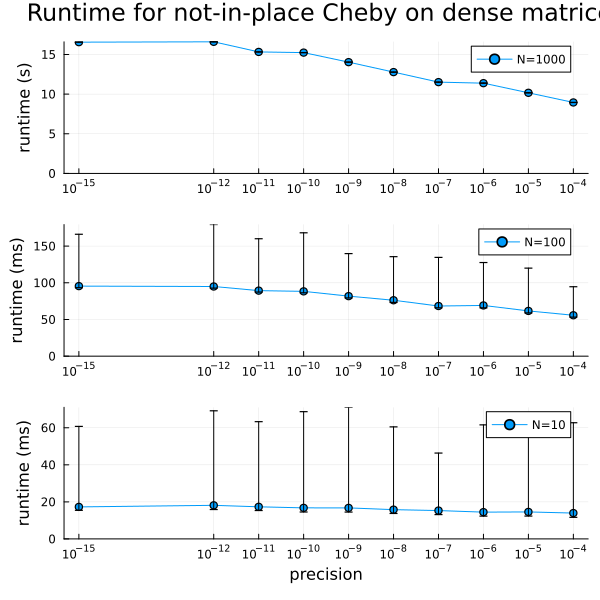

In [20]:
plot_prec_runtimes(
    prec_runtime_data,
    [1000, 100, 10];
    units = Dict(1000 => :s, 100 => :ms, 10 => :ms),
    size = (600, 600),
    plot_title = "Runtime for not-in-place Cheby on dense matrices",
    csv = datadir("cheby_notinplace_dense_runtime_N={N}.csv"),
)

## Scaling with Spectral Envelope

For larger system sizes, the runtime of the propagation should be dominated by matrix-vector products. The number of matrix_vector products should depend only on the desired precision and the spectral envelope of the system (for `dt=1.0`; or alternatively, on `dt` if the spectral envelope is kept constant). We analyze here how the number of matrix-vector products scales with the spectral envelope for the default "high" precision (machine precision), and for lower precision (roughly half machine precision).

This scaling should be mostly independent of the size or the encoding of the system.

In [21]:
QuantumPropagators.enable_timings();

scaling_data = run_or_load(datadir("benchmark_scaling.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = params(
            N = 100,
            spectral_envelope = Vary(0.5, 1.0, 5.0, 10.0, 15.0, 20.0, 25.0),
            exact_spectral_envelope = true,
            number_of_controls = 1,
            density = 1,
            hermitian = true,
            dt = 1.0,
            nt = 1001,
        ),
        benchmark_parameters = params(
            method = Cheby,
            inplace = false,
            cheby_coeffs_limit = Vary(1e-15, 1e-8)
        ),
        generate_benchmark = generate_timing_data,
        systems_cache = SYSTEMS_CACHE,
    )
end;

QuantumPropagators.disable_timings();

[ Info: File data/B02_01_Cheby_NotInPlace_Dense/benchmark_scaling.jld2 does not exist. Creating it now.


benchmark:         14%|████▊                            |  ETA: 0:00:10

benchmark:         21%|███████▏                         |  ETA: 0:00:09

benchmark:         29%|█████████▍                       |  ETA: 0:00:07

benchmark:         36%|███████████▊                     |  ETA: 0:00:06

benchmark:         43%|██████████████▏                  |  ETA: 0:00:06

benchmark:         50%|████████████████▌                |  ETA: 0:00:05

benchmark:         57%|██████████████████▉              |  ETA: 0:00:04

benchmark:         64%|█████████████████████▎           |  ETA: 0:00:03

benchmark:         71%|███████████████████████▋         |  ETA: 0:00:02

benchmark:         79%|█████████████████████████▉       |  ETA: 0:00:02

benchmark:         86%|████████████████████████████▎    |  ETA: 0:00:01

benchmark:         93%|██████████████████████████████▋  |  ETA: 0:00:01

benchmark:        100%|█████████████████████████████████| Time: 0:00:06

In [22]:
scaling_data

Row,spectral_envelope,cheby_coeffs_limit,timesteps,matrix_vector_products,percent
1,0.5,1.0e-15,1000,12000,72.4095
2,0.5,1.0e-8,1000,8000,76.4111
3,1.0,1.0e-15,1000,15000,71.15
4,1.0,1.0e-8,1000,10000,71.906
5,5.0,1.0e-15,1000,26000,81.5282
6,5.0,1.0e-8,1000,18000,77.1036
7,10.0,1.0e-15,1000,36000,75.3807
8,10.0,1.0e-8,1000,27000,80.9153
9,15.0,1.0e-15,1000,43000,76.9291
10,15.0,1.0e-8,1000,33000,77.7704


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_Cheby_NotInPlace_Dense/cheby_scaling_high.csv
[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_Cheby_NotInPlace_Dense/cheby_scaling_low.csv


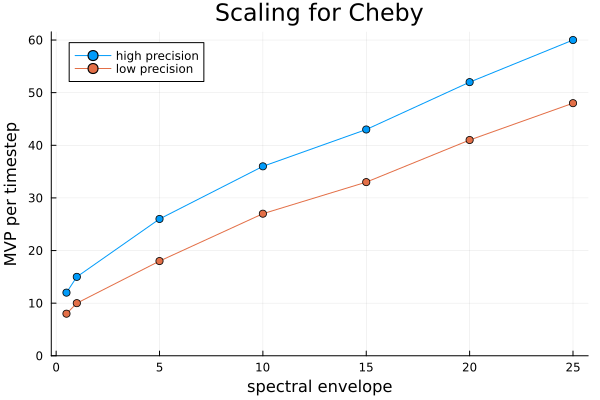

In [23]:
plot_scaling(
    scaling_data;
    plot_title = "Scaling for Cheby",
    csv = datadir("cheby_scaling_{key}.csv")
) do row
    if row[:cheby_coeffs_limit] == 1e-15
        return :high
    elseif row[:cheby_coeffs_limit] == 1e-8
        return :low
    else
        error("Unexpected `cheby_coeffs_limit`")
    end
end

## Overhead with System Size

For sufficiently large systems, the propagation should be dominated by matrix-vector products. Here, we analyze the "overhead", i.e., the percentage of the runtime _not_ spent in matrix-vector products, for smaller systems.

In [24]:
QuantumPropagators.enable_timings();

overhead_data = run_or_load(datadir("benchmark_overhead.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = params(
            N = Vary(5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
            spectral_envelope = 1.0,
            exact_spectral_envelope = true,
            number_of_controls = 1,
            density = 1,
            hermitian = true,
            dt = 1.0,
            nt = 1001,
        ),
        benchmark_parameters = params(method = Cheby, inplace = false),
        generate_benchmark = generate_timing_data,
        systems_cache = SYSTEMS_CACHE,
    )
end

QuantumPropagators.disable_timings();

[ Info: File data/B02_01_Cheby_NotInPlace_Dense/benchmark_overhead.jld2 does not exist. Creating it now.


benchmark:         15%|█████▏                           |  ETA: 0:03:36

benchmark:         23%|███████▋                         |  ETA: 0:03:21

benchmark:         31%|██████████▏                      |  ETA: 0:03:30

benchmark:         38%|████████████▊                    |  ETA: 0:02:37

benchmark:         46%|███████████████▎                 |  ETA: 0:01:55

benchmark:         54%|█████████████████▊               |  ETA: 0:01:25

benchmark:         62%|████████████████████▎            |  ETA: 0:01:12

benchmark:         85%|███████████████████████████▉     |  ETA: 0:00:21

benchmark:         92%|██████████████████████████████▌  |  ETA: 0:00:10

benchmark:        100%|█████████████████████████████████| Time: 0:02:05


In [25]:
overhead_data

Row,N,timesteps,matrix_vector_products,percent
1,5,1000,12000,30.5451
2,10,1000,12000,34.6268
3,50,1000,13000,60.3504
4,100,1000,13000,70.9189
5,200,1000,13000,75.3455
6,300,1000,13000,89.8362
7,400,1000,13000,96.4183
8,500,1000,13000,96.2322
9,600,1000,13000,96.4696
10,700,1000,13000,97.5022


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_Cheby_NotInPlace_Dense/cheby_notinplace_dense_overhead.csv


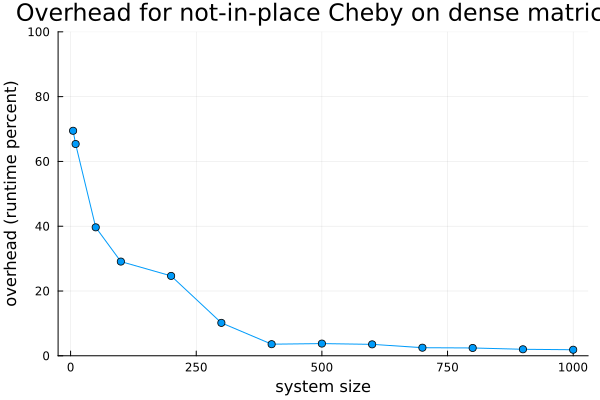

In [26]:
plot_overhead(
    overhead_data;
    csv = datadir("cheby_notinplace_dense_overhead.csv"),
    plot_title = "Overhead for not-in-place Cheby on dense matrices",
)